In [1]:
import keras
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

C:\Users\ezzab\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


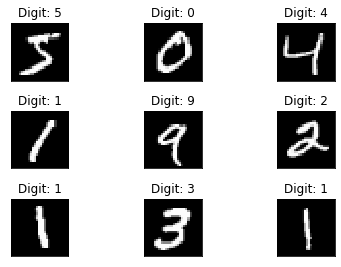

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [9]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
from keras import layers
img_rows, img_cols = 28, 28
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [10]:
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from keras.utils import plot_model, to_categorical##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [14]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [15]:
batch_size = 128
num_epoch = 3
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.2723 - accuracy: 0.9158 - val_loss: 0.0622 - val_accuracy: 0.9797
Epoch 2/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0915 - accuracy: 0.9723 - val_loss: 0.0391 - val_accuracy: 0.9871
Epoch 3/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0685 - accuracy: 0.9794 - val_loss: 0.0334 - val_accuracy: 0.9888
Epoch 4/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0291 - val_accuracy: 0.9899
Epoch 5/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0479 - accuracy: 0.9856 - val_loss: 0.0304 - val_accuracy: 0.9905
Epoch 6/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0301 - val_accuracy: 0.9908
Epoch 7/10
60000/60000 [==============================] - 102s

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.025301996527289157
Test accuracy: 0.9922000169754028


KeyError: 'acc'

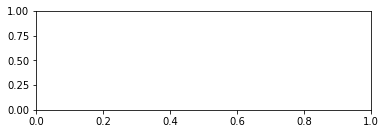

In [19]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [25]:
import pandas as pd
import torch
import numpy as np

train_labels = pd.read_csv('train_max_y.csv')
train_images = torch.load('digitData.pkl')
test_images = pd.read_pickle('test_max_x')

In [26]:
y_pred = []
for img in train_images:
    digit_pred = [];
    if(len(img)==0):
        y_pred.append(-1)
    else: 
        for digit in img:
            digit = np.where(digit < 100, 0, 255)
            digit = digit/255;
            digit_pred.append(np.argmax(model.predict(np.reshape(digit, (-1, 28, 28, 1)))))
        y_pred.append(np.amax(digit_pred));

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(train_labels['Label'], y_pred))

0.58418
